# Project 2: Ames Housing Data and Kaggle Challenge 

General Assembly DSI 19 Project 2 Adrian Teng 

# Project Introduction

In this project, I am tasked to create a regression model based on the Ames Housing Dataset to predict the price of a house at sale.

# Problem Statement

A real estate company is trying to re-evaluate on the pricing of their housings at sale. Through this action, the company hope that it will increase the profit from the popular housing by not selling undervalue  and at the same time bringing more sales with a reasonable pricing for the less popular housing. It will improve the service of the company that they could provide to their clients, for example, in getting a house within the market value depending on their demand.

Hence, a Linear regression, Ridge and Lasso regression models will be created based on Ames Housing Data to show which model is more accurate in predicting the price of a house. 

# Executive Summary

In this project, it is splitted into three parts respectively:
- Data Cleaning (01_data_cleaning)
- Exploratory Data Analysis (02_eda)
- Conclusion (03_conclusion)

In the first notebook, 01_data_cleaning, data was reviewed. Missing and 'nan' values was replaced and outliners was treated accordingly.  

## Content
- Data Familiarization & Cleaning
- Looking for missing values
- Treating outliners


# Import Libraries

In [65]:
#import libraries

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set_style('darkgrid')


# Import Datasets

In [66]:
# import both the given datasets
ames_train = pd.read_csv('../datasets/train.csv')
ames_test = pd.read_csv('../datasets/test.csv')

In [67]:
# show all data columns and rows
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

# Data Familiarization and Cleaning

### Data Review

In [68]:
# check the size of the train data
ames_train.shape

(2051, 81)

In [69]:
# check the size of the test data
ames_test.shape

(879, 80)

In 'train' data, there is 2051 rows and 81 columns. While 'test' data, there is 879 rows and 80 columns.

In [70]:
ames_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [71]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


- The additional column in 'train' data, is the 'SalePrice'. 
- There are many 'Nan' and empty values in both data's columns.
- There is no specific trend on how the data is sorted. 


In [72]:
# Replacing spaces to underscores and standardise to lowercase for the columns 
ames_train.columns = ames_train.columns.map(lambda x: x.lower().replace(' ', '_'))
ames_test.columns = ames_test.columns.map(lambda x: x.lower().replace(' ', '_'))

### Data Types

In [73]:
# check the types for each columns in training data
ames_train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

In [74]:
# check the types for each columns in testing data
ames_test.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1         int64
bsmtfin_type_2      object
b

In [75]:
#Filter out numerical columns from the data
#removing categorical with numerical value 
numerical_colns = ames_train._get_numeric_data().drop(['ms_subclass', 'mo_sold', 'yr_sold', 'saleprice'], axis = 1)
numerical_colns = list(numerical_colns)

In [76]:
#Those not in numerical columns will be in categorical columns
categorical_colns = [i for i in ames_train.columns if i not in numerical_colns]
categorical_colns = list(categorical_colns)

In [77]:
#converting numerical categorical columns into strings 
ames_train['ms_subclass'] = ames_train['ms_subclass'].astype(str)
ames_train['mo_sold'] = ames_train['mo_sold'].astype(str)
ames_train['yr_sold'] = ames_train['yr_sold'].astype(str)

ames_test['ms_subclass'] = ames_test['ms_subclass'].astype(str)
ames_test['mo_sold'] = ames_test['mo_sold'].astype(str)
ames_test['yr_sold'] = ames_test['yr_sold'].astype(str)

### Looking for Missing Values

In [78]:
# check all he nulls in training data from highest to lowest
ames_train.isnull().sum().sort_values(ascending=False)

pool_qc            2042
misc_feature       1986
alley              1911
fence              1651
fireplace_qu       1000
lot_frontage        330
garage_finish       114
garage_cond         114
garage_qual         114
garage_yr_blt       114
garage_type         113
bsmt_exposure        58
bsmtfin_type_2       56
bsmtfin_type_1       55
bsmt_cond            55
bsmt_qual            55
mas_vnr_type         22
mas_vnr_area         22
bsmt_half_bath        2
bsmt_full_bath        2
garage_cars           1
garage_area           1
bsmt_unf_sf           1
bsmtfin_sf_2          1
total_bsmt_sf         1
bsmtfin_sf_1          1
overall_cond          0
exterior_2nd          0
exterior_1st          0
roof_matl             0
roof_style            0
year_remod/add        0
year_built            0
saleprice             0
overall_qual          0
land_contour          0
pid                   0
ms_subclass           0
ms_zoning             0
lot_area              0
street                0
lot_shape       

In [79]:
# check all he nulls in testing data from highest to lowest 
ames_test.isnull().sum().sort_values(ascending=False)

pool_qc            875
misc_feature       838
alley              821
fence              707
fireplace_qu       422
lot_frontage       160
garage_cond         45
garage_qual         45
garage_yr_blt       45
garage_finish       45
garage_type         44
bsmt_exposure       25
bsmtfin_type_1      25
bsmt_qual           25
bsmtfin_type_2      25
bsmt_cond           25
mas_vnr_area         1
mas_vnr_type         1
electrical           1
overall_cond         0
exter_qual           0
exter_cond           0
foundation           0
exterior_2nd         0
exterior_1st         0
roof_matl            0
roof_style           0
year_remod/add       0
year_built           0
sale_type            0
overall_qual         0
house_style          0
bldg_type            0
condition_2          0
condition_1          0
land_slope           0
lot_config           0
utilities            0
land_contour         0
lot_shape            0
street               0
lot_area             0
ms_zoning            0
ms_subclass

In [80]:
# dropping data with high null values as the data would not be accurate (assuming 100< of nulls)

drop_high_null_colns = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu', 'lot_frontage']
ames_train = ames_train.drop(drop_high_null_colns, axis = 1)
ames_test = ames_test.drop(drop_high_null_colns, axis = 1)

for x in drop_high_null_colns:       # a loop to remove high nulls from both list
    if x in numerical_colns:
        numerical_colns.remove(x)
    elif x in categorical_colns:
        categorical_colns.remove(x)


### Create a function to replace the 'nan' and missing values

In [81]:
# This function allows all the 'object' with missing values replace with 'None'
# This function allows all the 'int64' and 'float64' with missing values replace with 0
def replace_values(i):
    colns = list(i.select_dtypes(include=['object']).columns)
    i[colns] = i[colns].fillna(value='None') #replace "object" columns missing values with 'None'
    colns = list(i.select_dtypes(include = ['int64', 'float64']).columns)
    i[colns] = i[colns].fillna(value = 0) #replace "int64" & "float64" columns missing values with 0
    
replace_values(ames_train)
replace_values(ames_test)



print(f'Nulls in training data: {ames_train.isnull().sum().sort_values(ascending = False).sum()}')
print(f'Nulls in testing data: {ames_test.isnull().sum().sort_values(ascending = False).sum()}')

Nulls in training data: 0
Nulls in testing data: 0


Now all the 'nans' and missing values are replaced with 'None' or 0 for both data sets

### Treating Outliners 

<AxesSubplot:xlabel='gr_liv_area', ylabel='saleprice'>

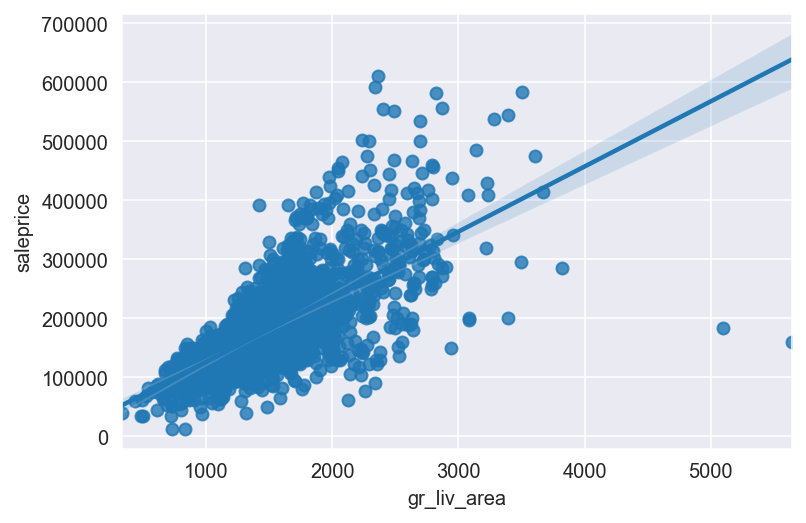

In [82]:
#Plotting of 'gr_liv_area' and 'saleprice'
sns.regplot(x = ames_train['gr_liv_area'], y = ames_train['saleprice'])

There are two distinct outliners in the scatter plot.

In [83]:
#Removing the outliners
ames_train.drop([960, 1885], inplace = True)

<AxesSubplot:xlabel='gr_liv_area', ylabel='saleprice'>

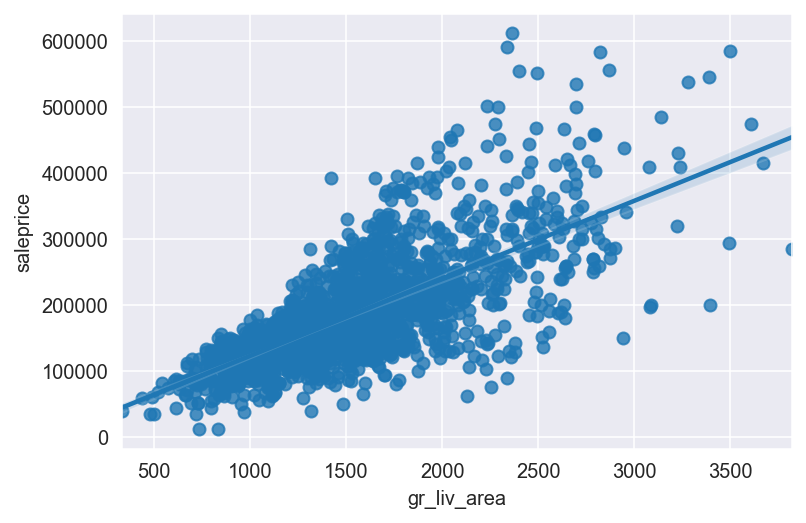

In [84]:
#Plotting of 'gr_liv_area' and 'saleprice' after remove the outliners
sns.regplot(x = ames_train['gr_liv_area'], y = ames_train['saleprice'])

The scatter plot now is more generalized without distinct outliners.

### Saving Clean Data

In [85]:
#saving the clean train data
ames_train.to_csv('../datasets/clean_train.csv')

In [86]:
#saving the clean test data
ames_test.to_csv('../datasets/clean_test.csv')